In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [27]:
df = pd.read_csv('framingham.csv')

In [28]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [30]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df['heartRate'].mean()
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
totChol_mean = df['totChol'].mean()
df['totChol'] = df['totChol'].fillna(totChol_mean)
df['BPMeds'] = df['BPMeds'].fillna(0)
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

condition = (df['cigsPerDay'].isnull()) & (df['currentSmoker'] == 1)
df.loc[condition, 'cigsPerDay'] = df['cigsPerDay'].mean()
df.loc[~condition, 'cigsPerDay'] = 0
df = df.dropna(subset=['glucose'])
df['education'] = df['education'].fillna(df['education'].median())
    

In [33]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\mwojc\PycharmProjects\heartDiseasePrediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


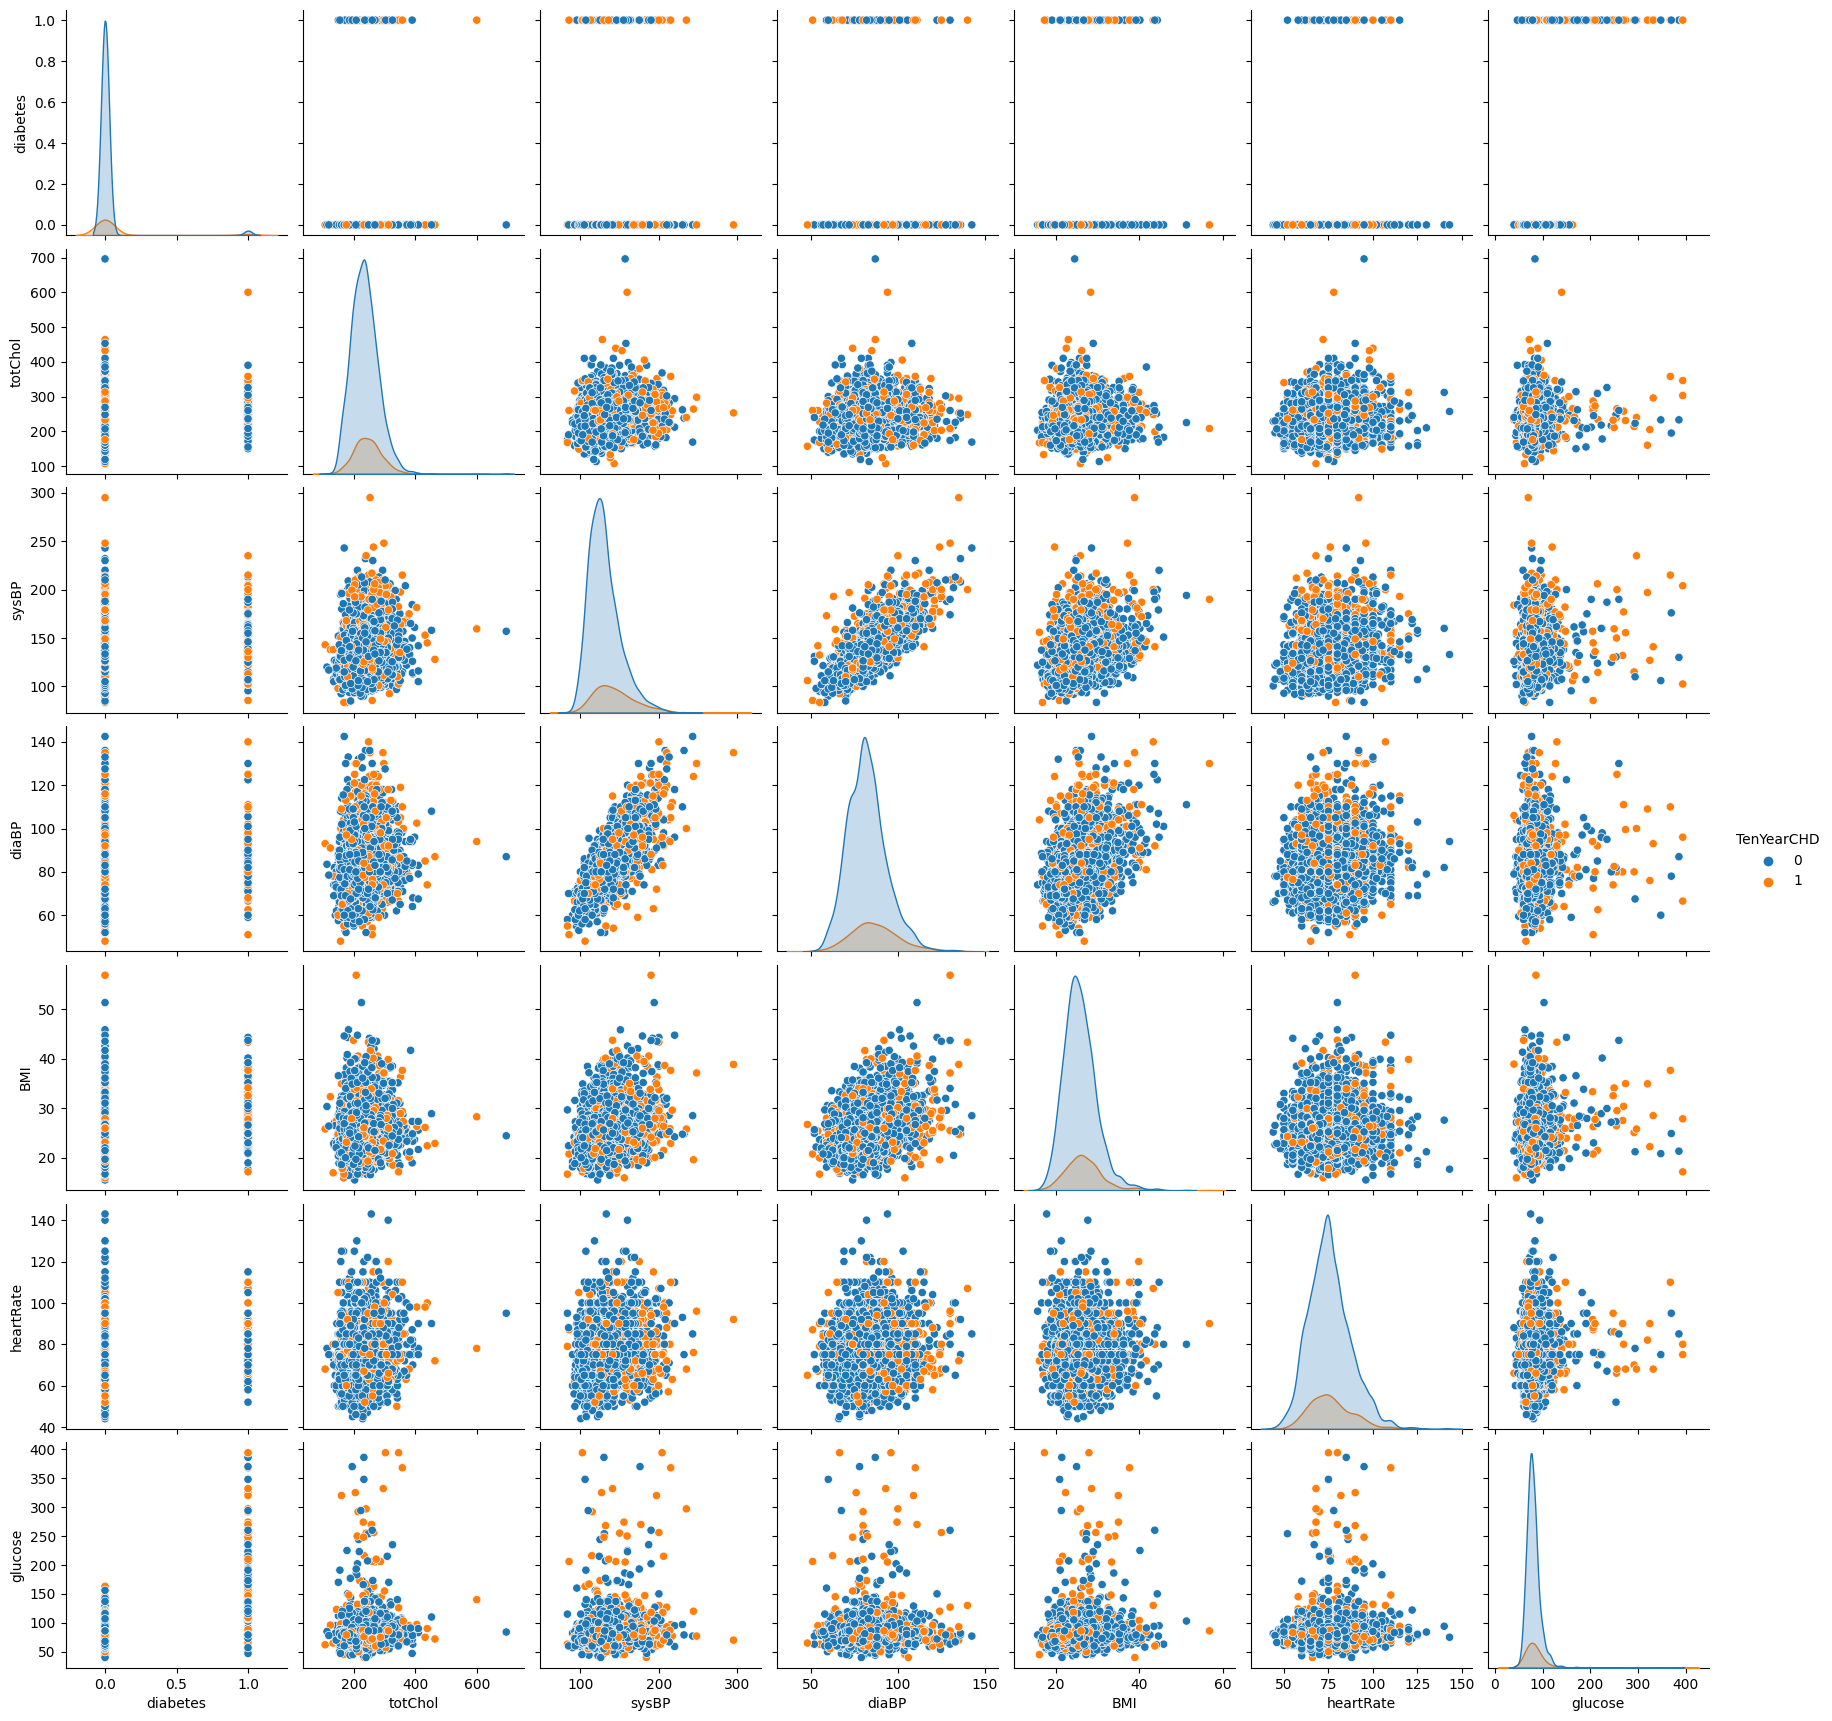

In [34]:
sns.pairplot(data=df[['diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']], hue='TenYearCHD')

C:\Users\mwojc\PycharmProjects\heartDiseasePrediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


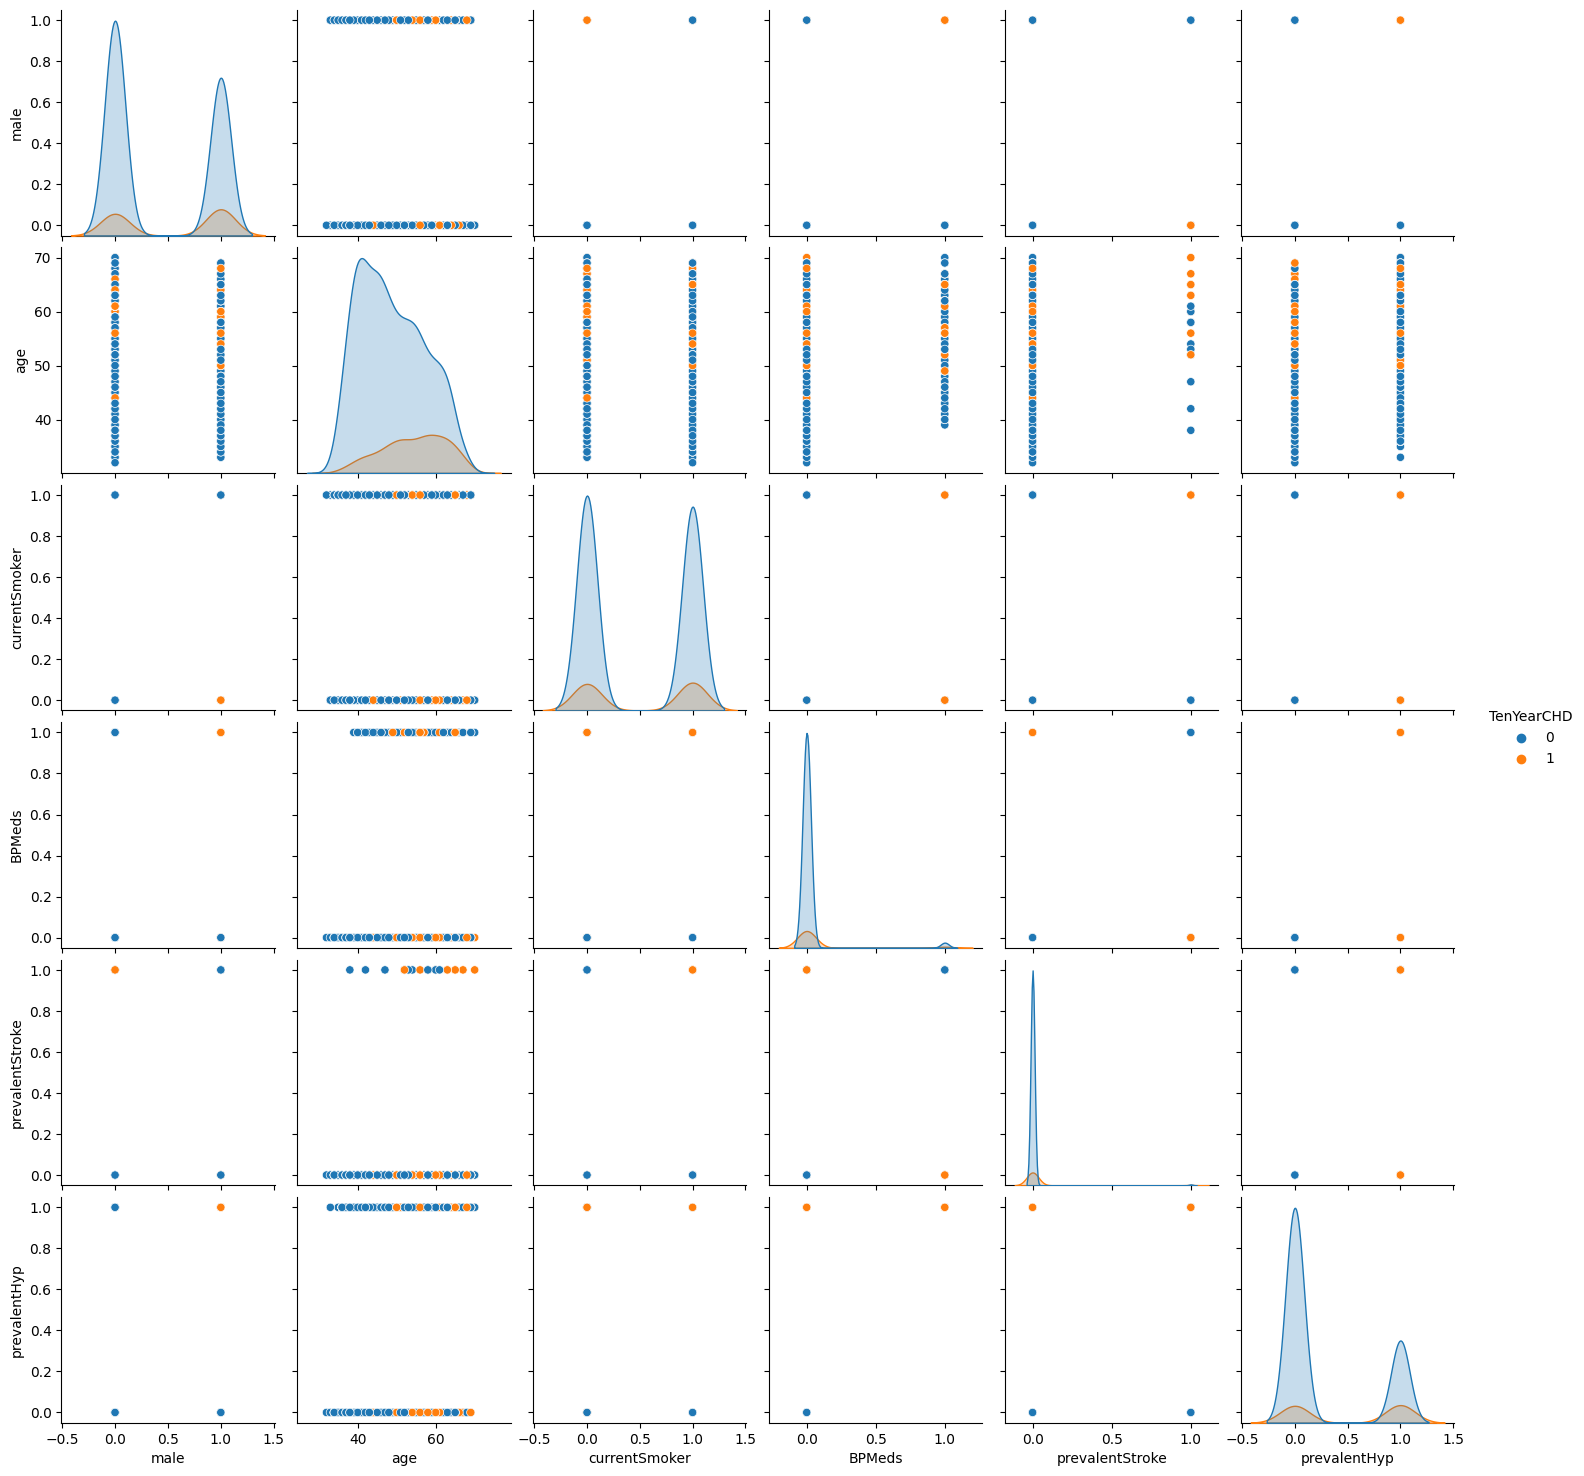

In [35]:
sns.pairplot(data=df[['male', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD']], hue='TenYearCHD')

### Quick Conclusions

#### Probability of TenYearCHD increases when patient:


- Is above 50
- Has had a stroke
- Is male
- Has Cholesterol above 200
#### Probability increases even more if high glucose levels are combined with:
- Diabetes
- High sysBP (near 200)
- DiaBP above 125
##### The case is similar with high levels of Cholesterol

### Creating a Logistic Regression Model

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()

#### 1)  Without feature scaling and feature selection

In [38]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

C:\Users\mwojc\PycharmProjects\heartDiseasePrediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8337662337662337

#### 2) With feature scaling

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.copy())
X_test_scaled = scaler.transform(X_test.copy())

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8441558441558441

#### 3) With feature selection

In [40]:
from sklearn.feature_selection import RFE

In [41]:
selector = RFE(estimator=logreg, n_features_to_select=12)

In [42]:
selector.fit(X_train.copy(), y_train.copy())

selected_features_train = selector.transform(X_train.copy())
selected_features_test = selector.transform(X_test.copy())

logreg.fit(selected_features_train, y_train)
y_pred = logreg.predict(selected_features_test)

accuracy = accuracy_score(y_pred, y_test)
accuracy

C:\Users\mwojc\PycharmProjects\heartDiseasePrediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mwojc\PycharmProjects\heartDiseasePrediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

0.8389610389610389

#### 4) With both feature scaling and feature selection

In [43]:
selector.fit(X_train_scaled.copy(), y_train.copy())
selected_features_train = selector.transform(X_train_scaled.copy())
selected_features_test = selector.transform(X_test_scaled.copy())

logreg.fit(selected_features_train, y_train)
y_pred = logreg.predict(selected_features_test)

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8441558441558441

### Conclusions